<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_84/blob/main/RETO1__SEMANA_9_A01793932.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Ciencia de datos**
### Tecnológico de Monterrey
### Prof Maria de la Paz Rico

## **Actividad de la Semana 9**
### **Reto 1: Limpieza, análisis, visualización y kmeans**

**Nombres y matrículas de los integrantes del equipo:**
* Maricel Parra Osorio: A01793932  
* Julio Perez: A01793880

In [1]:
#Instalación de librerías
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Cargue de librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests, zipfile
from io import BytesIO
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.model_selection import train_test_split, cross_validate,  RepeatedStratifiedKFold, learning_curve, validation_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, power_transform, RobustScaler
from sklearn.dummy import DummyRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, power_transform, RobustScaler
from sklearn.impute import SimpleImputer
from shapely.geometry import Point
from tqdm import tqdm
%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();
from sklearn.preprocessing import LabelEncoder
import geopandas as gpd
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import silhouette_score
from geopy.geocoders import Nominatim
import geopy.distance



##**Lectura e inspección de la base datos**

In [3]:
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

req = requests.get(url)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
df_sub=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df_sub.head()


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [4]:
df_sub.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [5]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [6]:
df_sub.isna().sum().sort_values(ascending=False)


SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [7]:
df_sub.isnull().sum().sum() 

1532

In [8]:
print('El total de registros es de:'+ str(df_sub.shape[0])+
       '\n El total de valores nulos es de:'+str(df_sub.isna().sum().sum())) 

print('Los valores nulos son el '+str(round(df_sub.isna().sum().sum()/df_sub.shape[0]*100,2))+ '% del total de los datos') 

El total de registros es de:1068
 El total de valores nulos es de:1532
Los valores nulos son el 143.45% del total de los datos


In [9]:
x = df_sub.drop(columns=['SEMAFORO']) 
y = df_sub['SEMAFORO']

print(x.shape)
print(y.shape)

(1068, 56)
(1068,)


In [10]:
df_sub.SEMAFORO.unique() #tenemos un problema multiclase

array(['Verde', 'Rojo', 'Amarillo'], dtype=object)

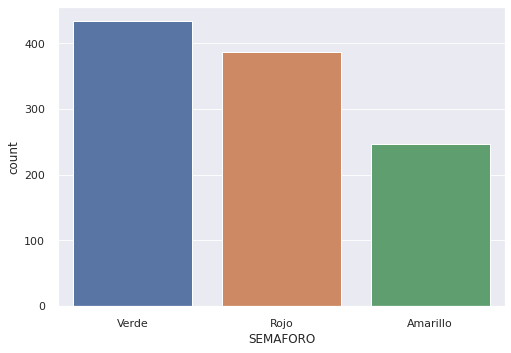

In [11]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="SEMAFORO", data=df_sub)

In [12]:
print('Total de datos generados:', y.shape[0]) 
# print('Total de datos en la clase positiva', y.sum())
# print('Total de datos en la clase negativa', (y.shape[0] - y.sum()))
# print("Porcentaje de clase :", (y.sum() / y.shape[0]))

Total de datos generados: 1068


##**Descripción del problema**

* Se plantea un problema de aprendizaje supervisado para conocer la calidad del agua de méxico a través de la aplicación del metódo de Kmeans, el cual crea agrupamiento de los datos. Es importante realizar este estudio porque las aguas subterráneas desempeñan un papel de fundamental importancia en el desarrollo socioeconómico de México, revelado en la dimensión del volumen que aporta para ser utilizado por los principales usuarios. El 38.7% del volumen total concesionado para usos consuntivos (agrícola, consumo público e industrial); es decir 32.906 millones de metros cúbicos por año al 2014, corresponden a aguas subterráneas.

* Acerca de las aguas subterráneas, México tiene delimitados 653 acuíferos, de los cuales 195 (30%) están sin disponibilidad; es decir que toda su capacidad disponible ya está concesionada o comprometida. Del total, 106 acuíferos (16%) se encuentran en condición de sobreexplotación, 31 (5%) con presencia de suelos salinos y agua salobre y 15 (2%) con intrusión marina.

* Los acuíferos son formaciones geológicas por las que circulan o se almacenan aguas del subsuelo que pueden ser extraídas para su explotación, uso y aprovechamiento. Además de funcionar como filtros purificadores, preservando la calidad del agua, funcionan como depósitos de almacenamiento y red de distribución, siendo posible extraer agua en cualquier época del año de prácticamente cualquier punto del acuífero. En México hay 12 divisiones territorialesconforme a la delimitación de los 653 acuíferos establecidos en el país.

* La medición de la calidad del agua subterránea se
realiza empleando como referencia los estándares
nacionales e internacionales para el agua de
consumo. Sin embargo, la calidad del agua se
mide en la fuente de abastecimiento, es decir, en
su condición natural, sin tratamiento o
potabilización.[1]

## **Preprocesamiento de la base de datos**

In [13]:
Categoricas = ['CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR',
                       'CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB',
                       'CALIDAD_MN','CALIDAD_FE']

Numericas= ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L' ]


In [14]:
df_sub[Categoricas].T

,0,1,2,3,4,5,6,7,8,9,...,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067
CALIDAD_ALC,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,Alta,...,Alta,Alta,Alta,Indeseable como FAAP,Alta,Alta,Alta,Alta,Alta,Alta
CALIDAD_CONDUC,Permisible para riego,Buena para riego,Buena para riego,Buena para riego,Permisible para riego,Buena para riego,Buena para riego,Dudosa para riego,Permisible para riego,Permisible para riego,...,Permisible para riego,Permisible para riego,Permisible para riego,Permisible para riego,Permisible para riego,Dudosa para riego,Buena para riego,Dudosa para riego,Permisible para riego,Permisible para riego
CALIDAD_SDT_ra,Cultivos sensibles,Excelente para riego,Excelente para riego,Excelente para riego,Cultivos con manejo especial,Cultivos sensibles,Excelente para riego,Cultivos con manejo especial,Cultivos sensibles,Cultivos con manejo especial,...,Cultivos sensibles,Cultivos sensibles,Cultivos sensibles,Cultivos con manejo especial,Cultivos con manejo especial,Cultivos con manejo especial,Excelente para riego,Cultivos con manejo especial,Cultivos sensibles,Excelente para riego
CALIDAD_SDT_salin,Potable - Dulce,Potable - Dulce,Potable - Dulce,Potable - Dulce,Ligeramente salobres,Potable - Dulce,Potable - Dulce,Ligeramente salobres,Potable - Dulce,Ligeramente salobres,...,Potable - Dulce,Potable - Dulce,Potable - Dulce,Ligeramente salobres,Ligeramente salobres,Ligeramente salobres,Potable - Dulce,Ligeramente salobres,Potable - Dulce,Potable - Dulce
CALIDAD_FLUO,Potable - Optima,Potable - Optima,Alta,Potable - Optima,Baja,Baja,Baja,Media,Baja,Media,...,Baja,Potable - Optima,Baja,Media,Media,Baja,Baja,Potable - Optima,Potable - Optima,Media
CALIDAD_DUR,Potable - Dura,Potable - Dura,Potable - Dura,Potable - Dura,Potable - Dura,Potable - Dura,Potable - Dura,Potable - Dura,Potable - Dura,Muy dura e indeseable usos industrial y domestico,...,Potable - Dura,Potable - Dura,Muy dura e indeseable usos industrial y domestico,Muy dura e indeseable usos industrial y domestico,Muy dura e indeseable usos industrial y domestico,Muy dura e indeseable usos industrial y domestico,Potable - Dura,Muy dura e indeseable usos industrial y domestico,Potable - Dura,Potable - Dura
CALIDAD_COLI_FEC,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Aceptable,Contaminada,Buena calidad,Aceptable,Buena calidad,Contaminada,...,Potable - Excelente,Buena calidad,Contaminada,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Aceptable,Potable - Excelente,Potable - Excelente
CALIDAD_N_NO3,Potable - Excelente,Potable - Buena calidad,Potable - Excelente,Potable - Excelente,No apta como FAAP,Potable - Buena calidad,Potable - Excelente,No apta como FAAP,Potable - Excelente,Potable - Excelente,...,No apta como FAAP,Potable - Buena calidad,Potable - Buena calidad,No apta como FAAP,Potable - Excelente,No apta como FAAP,No apta como FAAP,No apta como FAAP,Potable - Excelente,Potable - Excelente
CALIDAD_AS,Apta como FAAP,Apta como FAAP,No apta como FAAP,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,No apta como FAAP,...,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente
CALIDAD_CD,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,...,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente


In [15]:
for i in df_sub[Numericas].columns:
    print(df_sub[i].value_counts())



157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64
496         4
320         4
292         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length: 925, dtype: int64
<0.2      162
0.466       3
0.5202      3
0.4993      2
0.482       2
         ... 
1.6185      1
0.6045      1
0.7042      1
0.4343      1
0.4002      1
Name: FLUORUROS_mg/L, Length: 862, dtype: int64
<20        26
121.512     6
53.8542     4
109.56      4
428.27      3
           ..
51.454      1
103         1
24.8725     1
71.6184     1
362.544     1
Name: DUR_mg/L, Length: 889, dtype: int64
<1.1    737
10       37
40       28
20       19
31 

In [16]:
for name in Numericas:
  df_sub[name] = df_sub[name].astype('str')
  df_sub[name] = df_sub[name].str.replace('<25','25') 
  df_sub[name] = df_sub[name].str.replace('<0.2','0.2') 
  df_sub[name] = df_sub[name].str.replace('<20','20') 
  df_sub[name] = df_sub[name].str.replace('<1.1','1.1')
  df_sub[name] = df_sub[name].str.replace('<0.02','0.02') 
  df_sub[name] = df_sub[name].str.replace('<0.01','0.01') 
  df_sub[name] = df_sub[name].str.replace('<0.003','0.003')
  df_sub[name] = df_sub[name].str.replace('<0.005','0.004') 
  df_sub[name] = df_sub[name].str.replace('<0.0005','0.0004') 
  df_sub[name] = df_sub[name].str.replace('<0.0015','0.0015') 
  df_sub[name] = df_sub[name].str.replace('<0.025','0.025')  
  df_sub[name]= df_sub[name].astype('float')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change fro

In [17]:
df_sub[Numericas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


In [18]:
df_sub.drop('SDT_mg/L', axis=1, inplace=True)

In [19]:
df_sub[Numericas].isna().sum().sort_values(ascending=False)

CONDUCT_mS/cm          6
ALC_mg/L               4
SDT_M_mg/L             2
DUR_mg/L               1
N_NO3_mg/L             1
FLUORUROS_mg/L         0
COLI_FEC_NMP/100_mL    0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

### **Visualización de las variables**

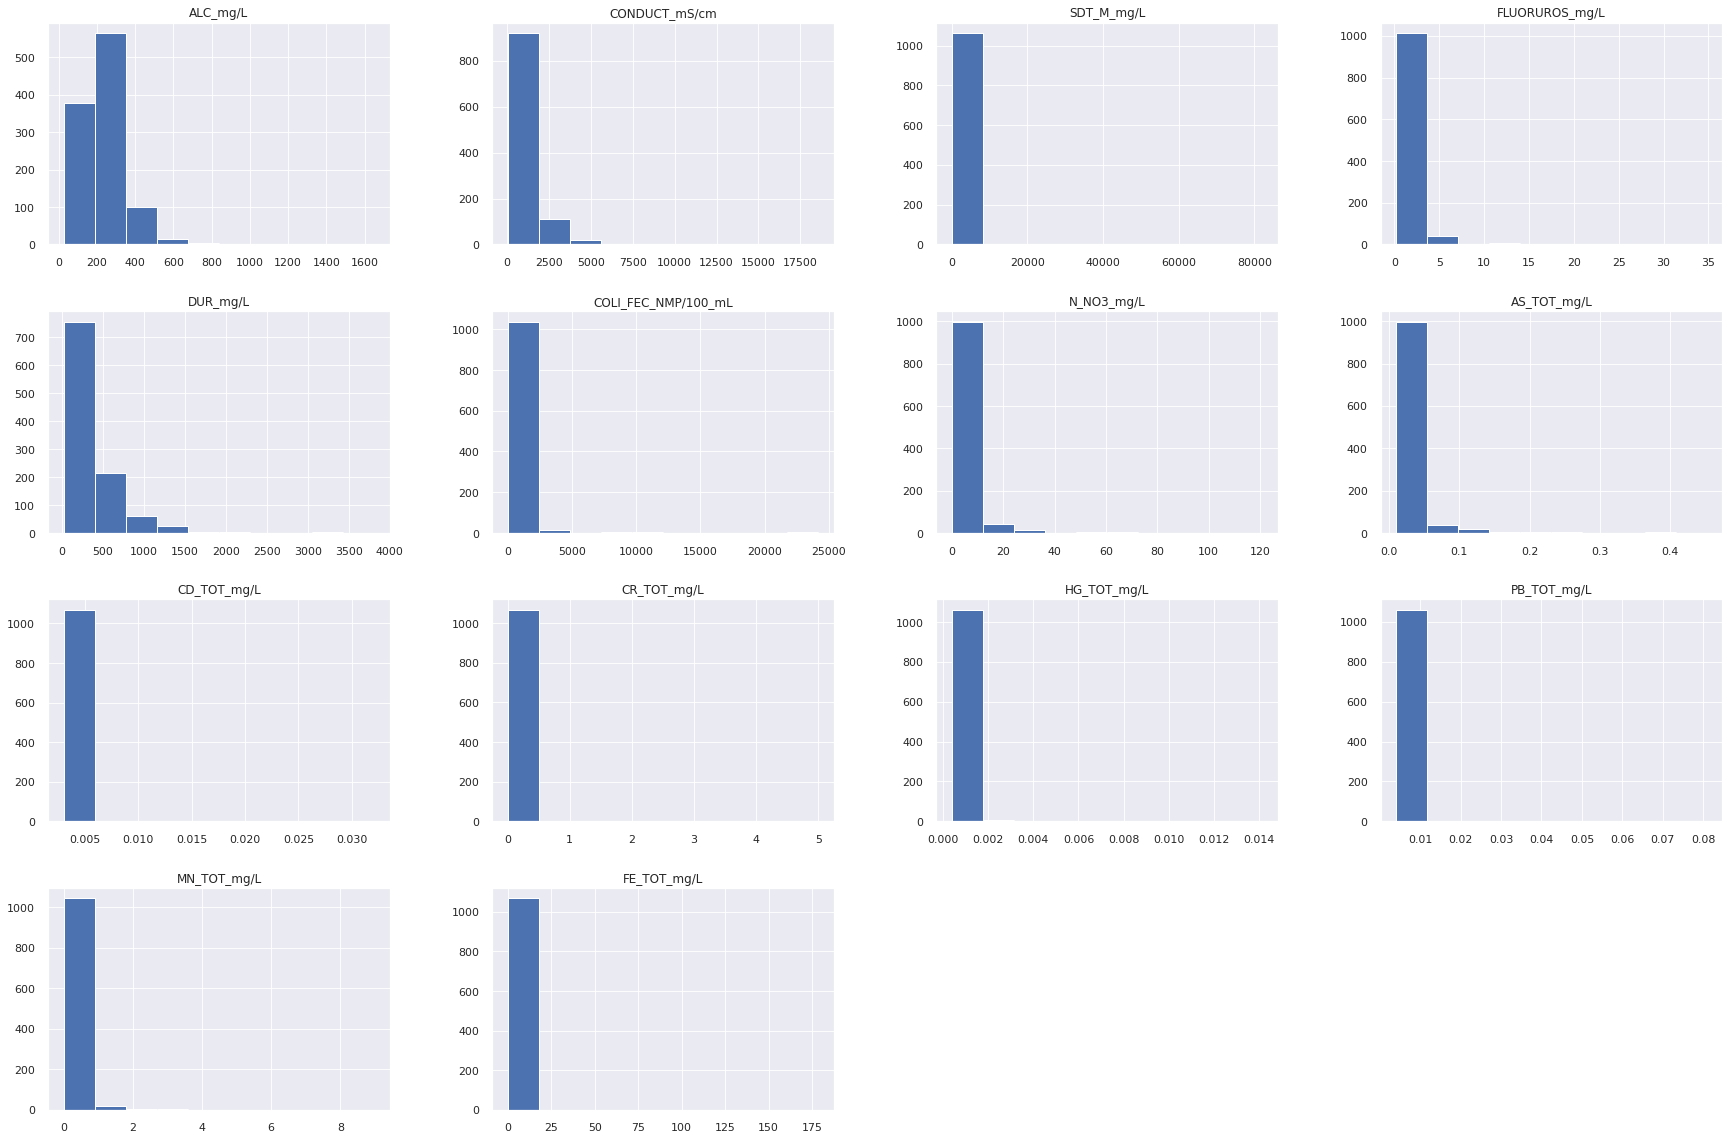

In [20]:
df_sub[Numericas].hist(figsize=(30,20))
plt.show()


In [21]:
skewness = pd.DataFrame(df_sub[Numericas].skew(), columns = ['skewness'])
skewness['skewness'] = ["Positively skewed" if i >= 1 else "Negatively skewed" if i <= -1 else "Normal Distribution" for i in skewness['skewness']]
skewness

,skewness
ALC_mg/L,Positively skewed
CONDUCT_mS/cm,Positively skewed
SDT_M_mg/L,Positively skewed
FLUORUROS_mg/L,Positively skewed
DUR_mg/L,Positively skewed
COLI_FEC_NMP/100_mL,Positively skewed
N_NO3_mg/L,Positively skewed
AS_TOT_mg/L,Positively skewed
CD_TOT_mg/L,Positively skewed
CR_TOT_mg/L,Positively skewed


>Podemos observar que las variables númericas estan sesgadas positivamente, por lo tanto, imputaremos los valores faltantes por la mediana.

### **Limpieza de la base de datos**

In [22]:
for name in df_sub[Numericas].columns:
  median = df_sub[name].median() 
  df_sub[name]= df_sub[name].replace(np.nan, median)


In [23]:
df_sub.describe().T

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1068.0,-101.891007,6.703263,-116.66425,-105.388865,-102.174180,-98.974716,-86.864120
LATITUD,1068.0,23.163618,3.887670,14.56115,20.212055,22.617190,25.510285,32.677713
PERIODO,1068.0,2020.000000,0.000000,2020.00000,2020.000000,2020.000000,2020.000000,2020.000000
ALC_mg/L,1068.0,235.558455,116.661485,26.64000,164.048750,215.527500,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1137.133052,1242.292889,50.40000,505.500000,815.000000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,895.454185,2748.991295,25.00000,337.700000,550.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.20000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.842003,359.514579,20.00000,121.274100,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.10000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.317663,8.341504,0.02000,0.650932,2.080932,5.200047,121.007813


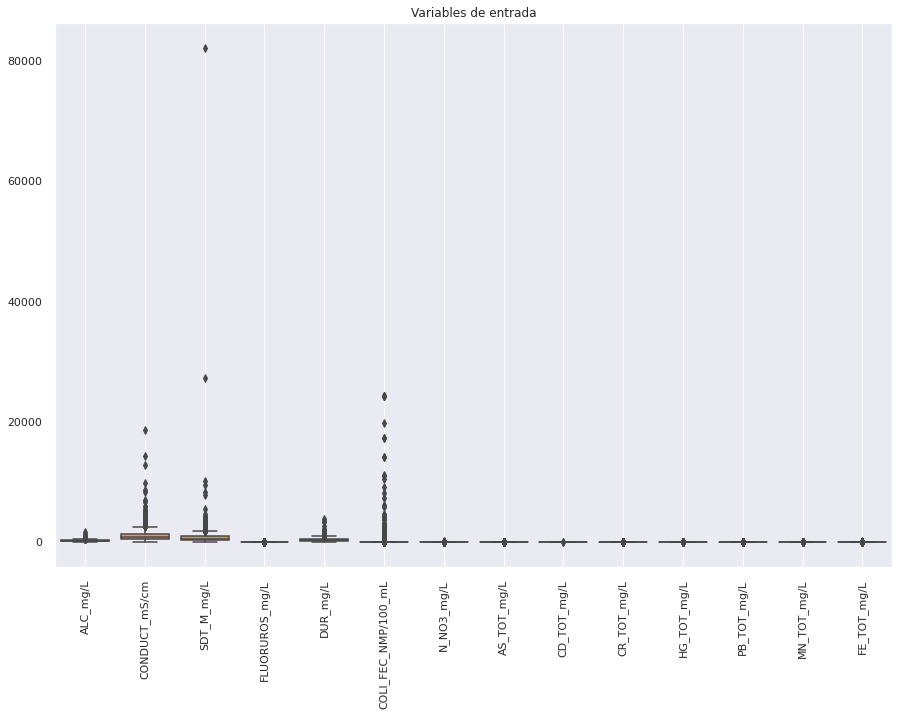

In [24]:
fig, axs = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df_sub[Numericas], ax=axs)
plt.title('Variables de entrada')
plt.grid()
plt.xticks(rotation=90)
plt.show()


>El boxplot de las variables se observa así porque los datos no estan escalados y hay presencia de outliers, unas en mayor proporción que otras.

### **Identificar correlaciones**

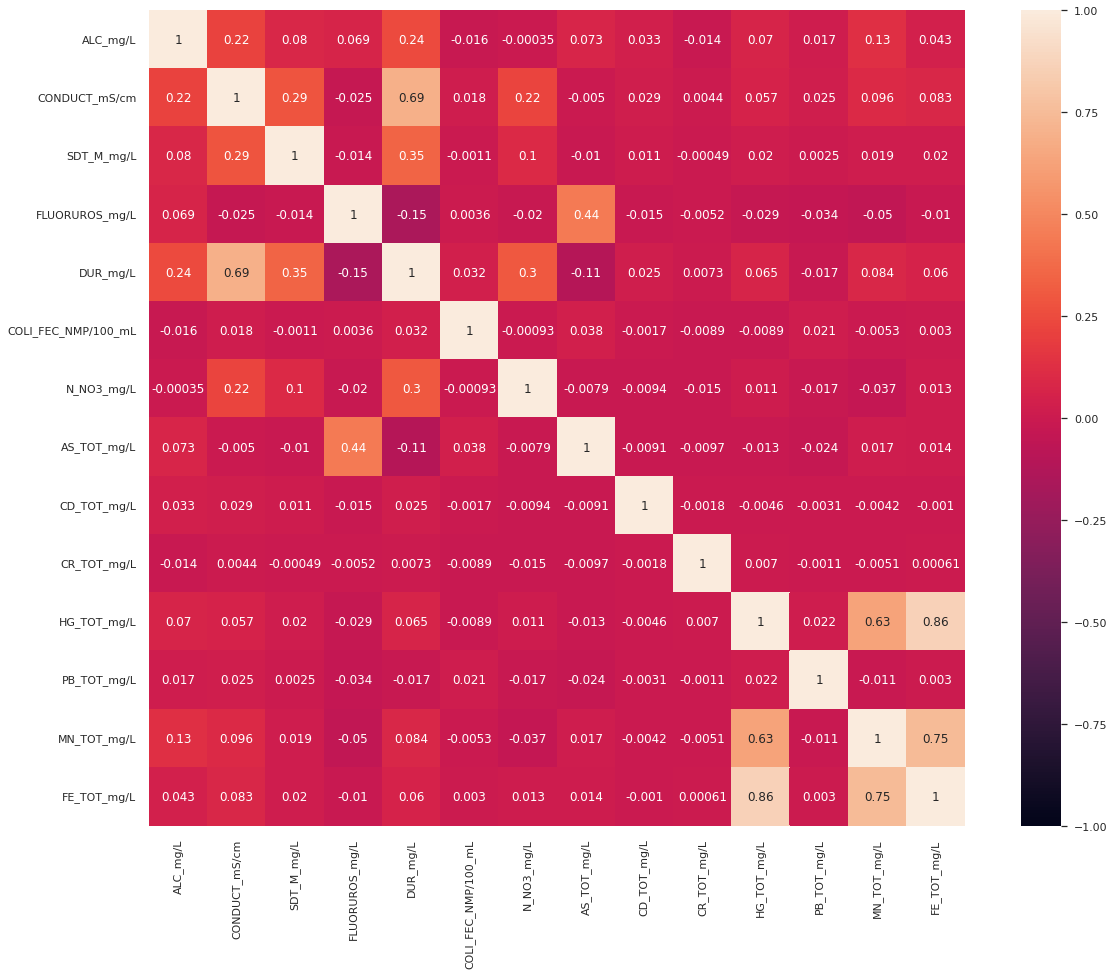

In [25]:
corr_matrix = df_sub[Numericas].corr()
f, ax = plt.subplots(figsize = (20,15)) #Definir el área de trabajo.
sns.heatmap(corr_matrix, vmax = 1, vmin = -1, square = True, annot = True)

plt.show()


>Las variables que más se correlacionan directamente entre si son: HG_TOT_mg/L y FE_TOT_mg/L; MN_TOT_mg/L y FE_TOT_mg/L; FE_TOT_mg/L y MN_TOT_mg/L.

####**Eliminar Outliers?**

Más adelante evaluaremos si la eliminación de los Outliers nos beneficiará en el rendimiento del modelo

In [26]:
#Eliminar los outliers
#Density based Outlier Detection: Local Outlier Factor (LOF):Comparar la densidad local de un punto con la densidad local de su K-NN
# El método de detección de valores atípicos basado en la densidad investiga la densidad de un objeto y la de sus vecinos. 
# Aquí, un objeto se identifica como un valor atípico si su densidad es relativamente mucho menor que la de sus vecinos
# Muchos conjuntos de datos del mundo real demuestran una estructura más compleja, donde los objetos pueden
#  considerarse valores atípicos con respecto a sus vecindarios locales, en lugar de con respecto a la distribución global de datos. [2]

# LOF > 1 ==> valor atípico / anomalía
# LOF < 1 ==> inlier

from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df_sub[Numericas]) # Returns -1 for anomalies/outliers and +1 for inliers.
X_score = clf.negative_outlier_factor_
X_score


array([-1.00897987, -1.00408063, -0.96271257, ..., -1.32154671,
       -1.0631941 , -1.02007359])

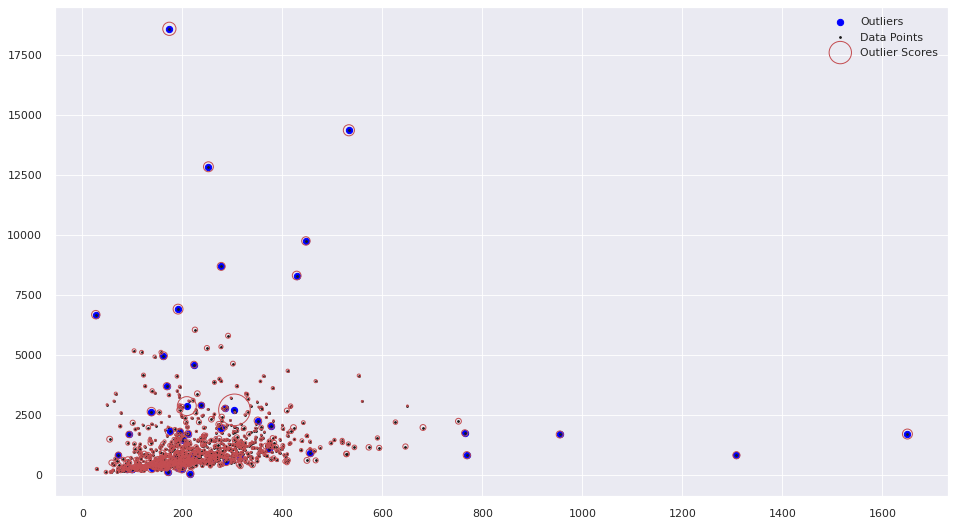

In [27]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

# threshold for negative lof values
threshold = -2
filter_ = outlier_score["score"] < threshold
outlier_index = outlier_score[filter_].index.tolist()

# Let's plot the outliers based on threshold we set
plt.figure(figsize = (16, 9))
plt.scatter(df_sub[Numericas].iloc[outlier_index,0], df_sub[Numericas].iloc[outlier_index,1], color = 'blue', s = 40, label = 'Outliers')
plt.scatter(df_sub[Numericas].iloc[:,0], df_sub[Numericas].iloc[:,1], color = 'k', s = 3, label = 'Data Points')
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())  # Normalization
plt.scatter(df_sub[Numericas].iloc[:,0], df_sub[Numericas].iloc[:,1], s=1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

In [28]:
#realizamos una copia para eliminar los outliers
df_sout_n= df_sub[Numericas].copy()
df_sout_y= df_sub['SEMAFORO']

In [29]:
df_sout_n= df_sout_n.drop(outlier_index)
df_sout_y = df_sout_y.drop(outlier_index)

###**Estandarización**

> Como se ha visto, los gráficos de caja son un poco confusos porque las características no están escaladas. Tenemos que normalizar las características para resolver este problema.

In [30]:
# Standardization
columns = df_sub[Numericas].columns.tolist()
scaler = StandardScaler()
x_std = scaler.fit_transform(df_sout_n)
x_std = pd.DataFrame(x_std, columns = columns)

x_std_cono = scaler.fit_transform(df_sub[Numericas])
x_std_cono = pd.DataFrame(x_std_cono, columns = columns)


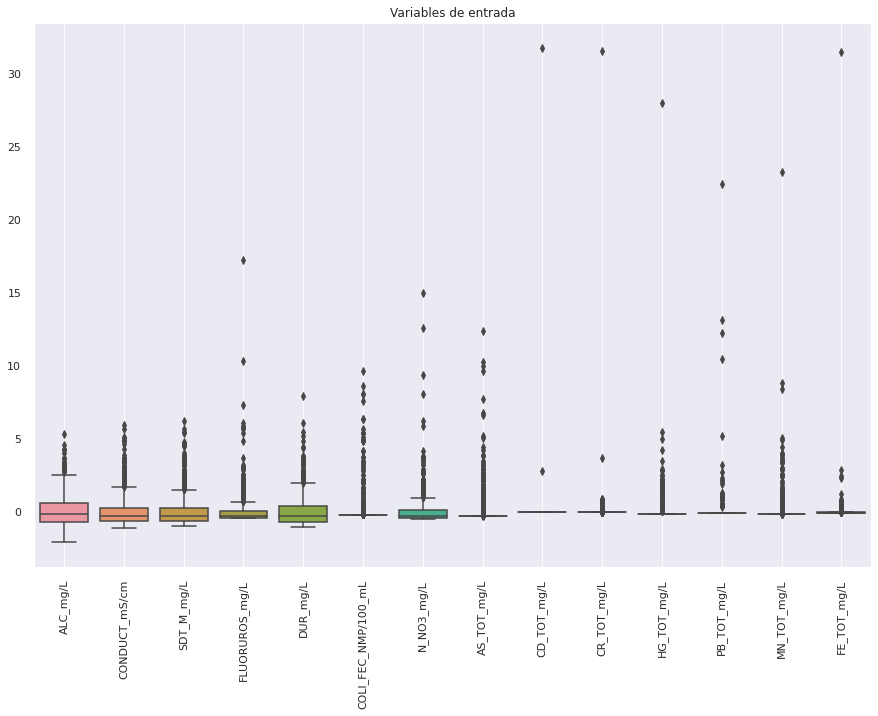

In [31]:
fig, axs = plt.subplots(figsize=(15, 10))
sns.boxplot(data=x_std, ax=axs)
plt.title('Variables de entrada')
plt.grid()
plt.xticks(rotation=90)
plt.show()


### **Transformación de las variables de entrada númericas**

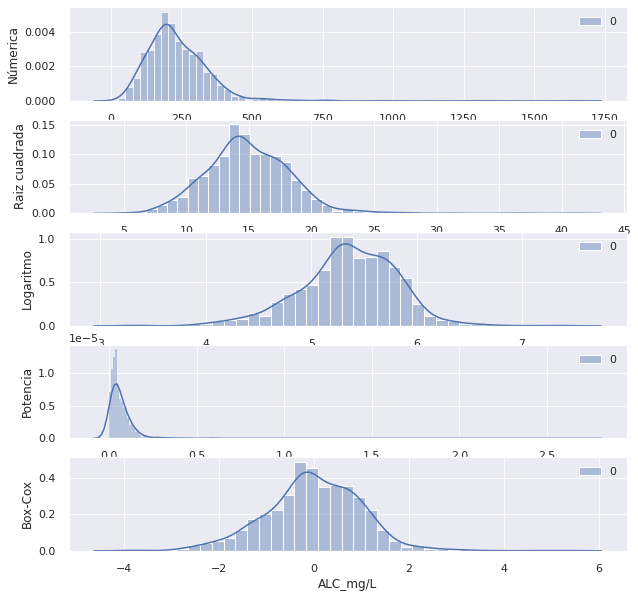

In [32]:
#se aplica a las variables de entrada númericas
sns.set(rc={'figure.figsize':(10,10)})

k=0
fig, axes=plt.subplots(5,1)
for k in range(0,1):
  plt.subplot(5,1, k+1)

  Transf0= df_sub[Numericas].iloc[:,k].to_numpy().reshape(-1,1)
  sns.histplot(Transf0, stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
  plt.xlabel(Numericas[k])
  if k==0:
    plt.ylabel('Númerica')

  plt.subplot(5,1, k+2)
  Transf1= np.sqrt(Transf0)
  sns.histplot(Transf1, stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
  plt.xlabel(Numericas[k])
  if k==0:
    plt.ylabel('Raiz cuadrada')

  plt.subplot(5,1, k+3)
  Transf2= np.log(Transf0)
  sns.histplot(Transf2, stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
  plt.xlabel(Numericas[k])
  if k==0:
    plt.ylabel('Logaritmo')


  plt.subplot(5,1, k+4)
  Transf3= Transf0**2
  sns.histplot(Transf3, stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
  plt.xlabel(Numericas[k])
  if k==0:
    plt.ylabel('Potencia')

    
  plt.subplot(5,1, k+5)
  Transf4= power_transform(df_sub[Numericas].iloc[:,k].to_numpy().reshape(-1,1), method='box-cox')
  sns.histplot(Transf4, stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
  plt.xlabel(Numericas[k])
  if k==0:
    plt.ylabel('Box-Cox')

Se observa que para esta base de datos 

##**Aplicar Kmeans**

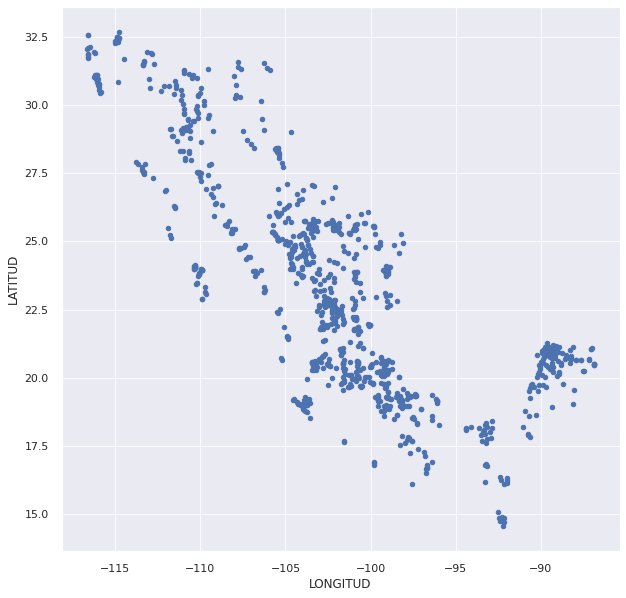

In [33]:
#Traemos variables de longitud y latitud

df_ubi= df_sub[['LONGITUD', 'LATITUD']]
df_ubi.plot.scatter('LONGITUD', 'LATITUD')


In [34]:
df_ubi["Coordinates"] = list(zip(df_ubi.LONGITUD, df_ubi.LATITUD))
df_ubi["Coordinates"] = df_ubi["Coordinates"].apply(Point)
df_ubi.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LONGITUD,LATITUD,Coordinates
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


In [35]:
gdf = gpd.GeoDataFrame(df_ubi, geometry="Coordinates")
gdf.head()

,LONGITUD,LATITUD,Coordinates
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)


In [36]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [37]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

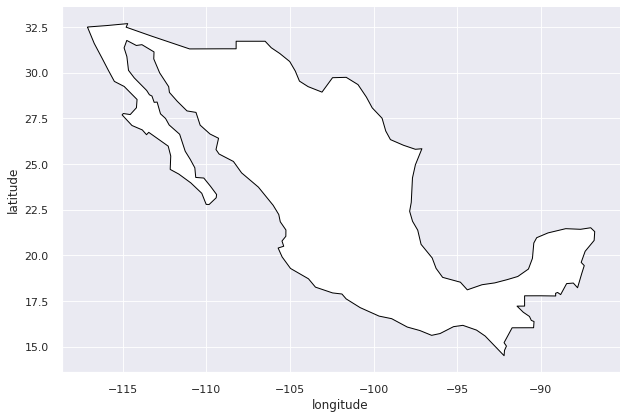

In [38]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)


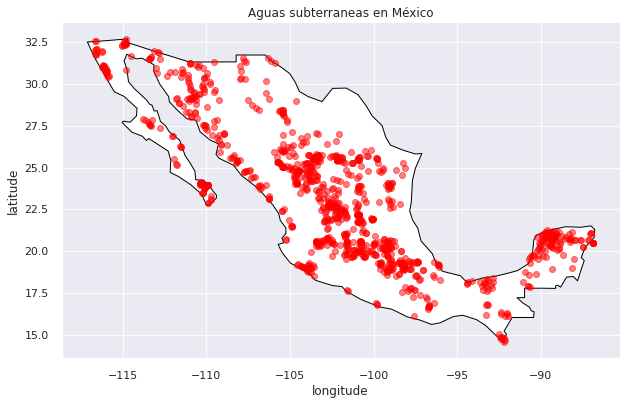

In [39]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Aguas subterraneas en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

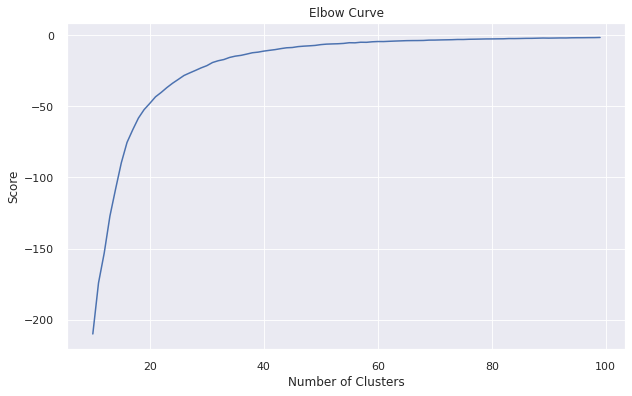

In [40]:
from sklearn.cluster import KMeans
n_cluster = range(10,100) 
mi_kmeans = [KMeans(n_clusters=i) for i in n_cluster]
Y_axis = df_sub[['LATITUD']]
X_axis = df_sub[['LONGITUD']]
calulo_kmeans = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]


# Visualize
plt.figure(figsize=(10,6))
plt.plot(n_cluster, calulo_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


Se observa que en el caso de querer segmentar, tenemos que la mejor decisión sería tener 20 agrupamientos que nos ayuden a explicar las regiones de las aguas subterraneas teniendo en cuenta que los acuíferos estan distribuidos por méxico y lograría tener una mayor caracterización e cada grupo diviendolos en este número, dado que hay regiones donde los acuíferos estan sobrepoblados y otros en los cuales no hay disponibilidad y estos factores influeyen en nuestro análisis.

### **Relación de calidad del agua con el agrupamiento de las aguas subterraneas usando la variable predictora SEMAFORO**

In [41]:
X = df_sub[['LONGITUD', 'LATITUD']]

kmeans = KMeans(n_clusters=20).fit(X)
centroids = kmeans.cluster_centers_ #sacar centroides
labels = kmeans.predict(X) # predecidos
C = kmeans.cluster_centers_ 

C_DF = pd.DataFrame(C) #convertirlo en DataFrame
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) #LINEA
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #PLOT

p_centro = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
p_centro 

,0,1,Coordinates
0,-102.087415,22.456609,POINT (-102.08742 22.45661)
1,-112.671813,27.005056,POINT (-112.67181 27.00506)
2,-89.613683,20.554097,POINT (-89.61368 20.55410)
3,-97.488283,18.286102,POINT (-97.48828 18.28610)
4,-105.202281,25.724593,POINT (-105.20228 25.72459)
5,-110.146688,23.819670,POINT (-110.14669 23.81967)
6,-110.788955,29.714956,POINT (-110.78896 29.71496)
7,-92.316415,15.472939,POINT (-92.31641 15.47294)
8,-101.156150,20.301589,POINT (-101.15615 20.30159)
9,-115.251913,31.614292,POINT (-115.25191 31.61429)


In [42]:
df_sub['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [43]:
y= pd.DataFrame(df_sub['SEMAFORO'])
y

,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo
...,...
1063,Rojo
1064,Rojo
1065,Rojo
1066,Verde


In [44]:
y['SEMAPHORE'] = y['SEMAFORO'].replace(to_replace = "Verde", value = "green")
y['SEMAPHORE'].replace(to_replace = "Rojo", value = "red", inplace=True)
y['SEMAPHORE'].replace(to_replace = "Amarillo", value = "yellow", inplace=True)
y

,SEMAFORO,SEMAPHORE
0,Verde,green
1,Verde,green
2,Rojo,red
3,Verde,green
4,Rojo,red
...,...,...
1063,Rojo,red
1064,Rojo,red
1065,Rojo,red
1066,Verde,green


In [45]:
gdf['LATITUDYLONGITUD'] = gdf['LATITUD'] + gdf['LONGITUD']
diccionario_semaforo = dict(zip(gdf.LATITUDYLONGITUD, y.SEMAPHORE))
diccionario_semaforo

import folium

lat = gdf.iloc[0]['LATITUD']
lng = gdf.iloc[0]['LONGITUD']
map = folium.Map(location=[lng, lat], zoom_start=1)
for _, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row["LATITUD"], row["LONGITUD"]],
        radius=12, 
        weight=2, 
        fill=True, 
        fill_color=diccionario_semaforo[row["LATITUDYLONGITUD"]],
        color=diccionario_semaforo[row["LATITUDYLONGITUD"]]
    ).add_to(map)
color='black'
for _, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row[1], row[0]],
        radius=12, 
        weight=2, 
        fill=True, 
        fill_color=color,
        color=color
    ).add_to(map)
map


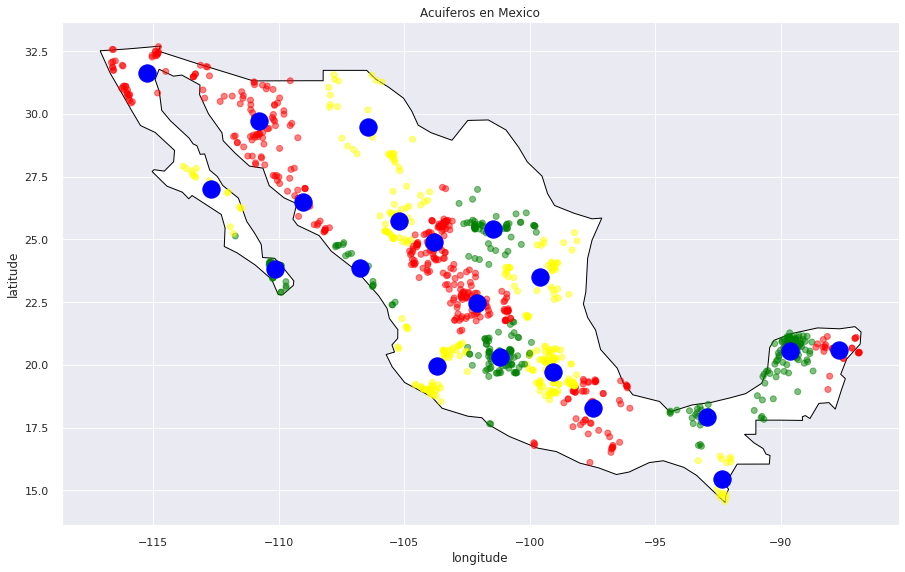

In [46]:
#Centroides
fig, gax = plt.subplots(figsize=(15,10))
colores = ['red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow']
color_asig = []

for row in labels:
  color_asig.append(colores[row])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

gdf.plot(ax=gax, color=color_asig, alpha = 0.5) 
p_centro.plot(ax=gax, color='blue', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [47]:
Labe = LabelEncoder()
df_sub["SEMAFORO_Type"]= Labe.fit_transform(df_sub["SEMAFORO"])
df_sub["SEMAFORO_Type"].unique()


array([2, 1, 0])

In [48]:
gdf['COLOR']= y['SEMAFORO']
gdf['CLUSTER'] = labels


In [49]:
df_gdf = gdf[gdf.CLUSTER == 0].copy()
df_gdf.shape

(97, 6)

In [50]:
list_moda=[]

for i in range(0,20): 
  nuevo_dataset = pd.DataFrame() 
  nuevo_dataset = gdf[gdf.CLUSTER == i].copy() 
  moda = nuevo_dataset['COLOR'].mode()[0] 
  list_moda.append(moda) 

len(list_moda)

20

In [51]:
p_centro['MODA'] = list_moda
p_centro

,0,1,Coordinates,MODA
0,-102.087415,22.456609,POINT (-102.08742 22.45661),Rojo
1,-112.671813,27.005056,POINT (-112.67181 27.00506),Verde
2,-89.613683,20.554097,POINT (-89.61368 20.55410),Amarillo
3,-97.488283,18.286102,POINT (-97.48828 18.28610),Verde
4,-105.202281,25.724593,POINT (-105.20228 25.72459),Rojo
5,-110.146688,23.819670,POINT (-110.14669 23.81967),Rojo
6,-110.788955,29.714956,POINT (-110.78896 29.71496),Verde
7,-92.316415,15.472939,POINT (-92.31641 15.47294),Verde
8,-101.156150,20.301589,POINT (-101.15615 20.30159),Verde
9,-115.251913,31.614292,POINT (-115.25191 31.61429),Amarillo


In [52]:
list_eng = []

for i in range(0,20):
  if list_moda[i] == 'Verde':
    list_eng.append('green')
  if list_moda[i] == 'Rojo':
    list_eng.append('red')
  if list_moda[i] == 'Amarillo':
    list_eng.append('yellow')

len(list_eng)

20

In [53]:
list_eng_u = []

for i in range(0,1068):
  if gdf.COLOR[i] == 'Verde':
    list_eng_u.append('green')
  if gdf.COLOR[i] == 'Rojo':
    list_eng_u.append('red')
  if gdf.COLOR[i] == 'Amarillo':
    list_eng_u.append('yellow')

len(list_eng_u)

1068

In [54]:
print(p_centro)
print(gdf)

             0          1                  Coordinates      MODA
0  -102.087415  22.456609  POINT (-102.08742 22.45661)      Rojo
1  -112.671813  27.005056  POINT (-112.67181 27.00506)     Verde
2   -89.613683  20.554097   POINT (-89.61368 20.55410)  Amarillo
3   -97.488283  18.286102   POINT (-97.48828 18.28610)     Verde
4  -105.202281  25.724593  POINT (-105.20228 25.72459)      Rojo
5  -110.146688  23.819670  POINT (-110.14669 23.81967)      Rojo
6  -110.788955  29.714956  POINT (-110.78896 29.71496)     Verde
7   -92.316415  15.472939   POINT (-92.31641 15.47294)     Verde
8  -101.156150  20.301589  POINT (-101.15615 20.30159)     Verde
9  -115.251913  31.614292  POINT (-115.25191 31.61429)  Amarillo
10 -103.683026  19.971602  POINT (-103.68303 19.97160)      Rojo
11 -101.469838  25.407309  POINT (-101.46984 25.40731)      Rojo
12 -103.821138  24.909835  POINT (-103.82114 24.90983)      Rojo
13 -106.437024  29.484154  POINT (-106.43702 29.48415)      Rojo
14  -92.940855  17.920287

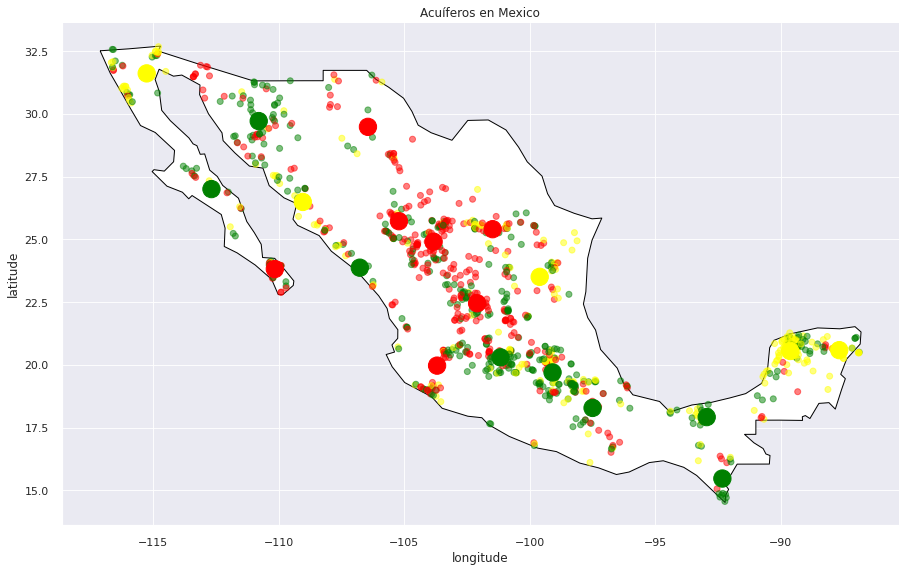

In [55]:
#CENTROIDES CON COLORES CON SU MODA

fig, gax = plt.subplots(figsize=(15,10))
color_X = []
color_un = gdf['COLOR']

for row in range(0,len(list_eng)):
  color_X.append(list_eng[row])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

gdf.plot(ax=gax, color=list_eng_u, alpha = 0.5) 
p_centro.plot(ax=gax, color=color_X, alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuíferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

>De acuerdo al gráfico anterior, observamos que cada cluster tiene el color de la moda o valor que más se repite, el cual nos indica la calidad del agua en esa zona. Podemos observar que la zona donde las aguas subterraneas tienen la peor calidad es el centro de méxico, lo cual corresponde a las ciudades donde los acuíferos estan sobreexplotados, un acuífero está sobreexplotado cuando el volumen de agua extraído supera el volumen de recarga. La persistencia de esta condición por largos periodos de tiempo puede generar graves impactos ambientales. En México desde el año 2001 el número de acuíferos sobreexplotados oscila entre 100 y 106.[1]

In [56]:
df_sub2 = df_sub.copy(deep=True)
df_sub2['CLUSTER'] = labels
_clusters = df_sub2.groupby('CLUSTER')['CLUSTER'].count()
print(_clusters)

CLUSTER
0      97
1      16
2      93
3      62
4      46
5      33
6      66
7      15
8      78
9      50
10     62
11     59
12    108
13     30
14     27
15     31
16     98
17     22
18     27
19     48
Name: CLUSTER, dtype: int64


#**Referencias**

[1] Martínez, F. (2019, 15 marzo). Acuíferos de México: Aguas Subterráneas en México - Mapa. paratodomexico.com. https://paratodomexico.com/geografia-de-mexico/hidrografia-de-mexico/acuiferos-de-mexico.html

[2] Chepenko, D. (2018, September 17). A Density-based algorithm for outlier detection. Medium. https://towardsdatascience.com/density-based-algorithm-for-outlier-detection-8f278d2f7983

‌

